Для начала загрузим все необходимые нам библиотеки

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Context

In [2]:
titanic_data = pd.read_csv('train.csv')
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


Рассмотрим, какие значения могут принимать различные переменные

In [3]:
titanic_data['Survived'].unique().tolist()

[1, 0]

In [4]:
titanic_data['Pclass'].unique().tolist()

[1, 3, 2]

In [5]:
titanic_data['Sex'].unique().tolist()

['male', 'female']

In [6]:
titanic_data['Embarked'].unique().tolist()

['S', 'C', 'Q', nan]

# Data quality assessment

In [7]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Как можно заметить, dataset имеет 11 столбцов, некоторые из которых частично пустые:

 0.   PassengerId - id пассажира
 1.   Survived - выжил пассажир или нет  
 2.   Pclass - класс, которым пассажир путешествовал  
 3.   Name - имя и фамилия пассажира     
 4.   Sex - пол пассажира     
 5.   Age - возраст пассажира. Имеются пропуски (3292 пропуска, около 3,3%)
 6.   SibSp - количество братьев / сестер / супругов на борту Титаника 
 7.   Parch - количество родителей / детей на борту Титаника  
 8.   Ticket - номер билета пассажира (4623 пропуска, около 4,6%) 
 9.   Fare - цена билета (134 пропуска, около 0,1%)
 10.  Cabin - номер каюты (67866 пропусков, около 67,9%. Много пропусков) 
 11.  Embarked - название порта, в котором пассажир сел на Титаник (250 пропусков, около 0,25%)

In [8]:
titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,1,2,"Bell, Adele",female,62.00,0,0,PC 15008,14.86,D17243,C
99996,99996,0,2,"Brown, Herman",male,66.00,0,0,13273,11.15,NaN,S
99997,99997,0,3,"Childress, Charles",male,37.00,0,0,NaN,9.95,NaN,S
99998,99998,0,3,"Caughlin, Thomas",male,51.00,0,1,458654,30.92,NaN,S


### Проверка на дубликаты

Проверим данные на наличие дубликатов 

In [9]:
titanic_data.duplicated().sum()

0

Дупликатов нет

### Заполняем пустые значения

Заполним некоторые пропущенные значения медианными значениями. Наилучший вариант для заполнения пропущенных значений средним - это заполнять поля в зависимости от пола (мужчина / женщина) и класса (1, 2, 3) пассажира.

##### Возраст

In [10]:
mAgefem1 = titanic_data['Age'][(titanic_data.Sex=='female') & (titanic_data.Pclass==1)].median()
mAgefem2 = titanic_data['Age'][(titanic_data.Sex=='female') & (titanic_data.Pclass==2)].median()
mAgefem3 = titanic_data['Age'][(titanic_data.Sex=='female') & (titanic_data.Pclass==3)].median()
mAgemale1 = titanic_data['Age'][(titanic_data.Sex=='male') & (titanic_data.Pclass==1)].median()
mAgemale2 = titanic_data['Age'][(titanic_data.Sex=='male') & (titanic_data.Pclass==2)].median()
mAgemale3 = titanic_data['Age'][(titanic_data.Sex=='male') & (titanic_data.Pclass==3)].median()

titanic_data.loc[(titanic_data.Sex=='female') & (titanic_data.Pclass==1) & (pd.isna(titanic_data.Age)), 'Age'] = mAgefem1
titanic_data.loc[(titanic_data.Sex=='female') & (titanic_data.Pclass==2) & (pd.isna(titanic_data.Age)), 'Age'] = mAgefem2
titanic_data.loc[(titanic_data.Sex=='female') & (titanic_data.Pclass==3) & (pd.isna(titanic_data.Age)), 'Age'] = mAgefem3
titanic_data.loc[(titanic_data.Sex=='male') & (titanic_data.Pclass==1) & (pd.isna(titanic_data.Age)), 'Age'] = mAgemale1
titanic_data.loc[(titanic_data.Sex=='male') & (titanic_data.Pclass==2) & (pd.isna(titanic_data.Age)), 'Age'] = mAgemale2
titanic_data.loc[(titanic_data.Sex=='male') & (titanic_data.Pclass==3) & (pd.isna(titanic_data.Age)), 'Age'] = mAgemale3

##### Цена билета

In [11]:
mFarefem1 = titanic_data['Fare'][(titanic_data.Sex=='female') & (titanic_data.Pclass==1)].median()
mFarefem2 = titanic_data['Fare'][(titanic_data.Sex=='female') & (titanic_data.Pclass==2)].median()
mFarefem3 = titanic_data['Fare'][(titanic_data.Sex=='female') & (titanic_data.Pclass==3)].median()
mFaremale1 = titanic_data['Fare'][(titanic_data.Sex=='male') & (titanic_data.Pclass==1)].median()
mFaremale2 = titanic_data['Fare'][(titanic_data.Sex=='male') & (titanic_data.Pclass==2)].median()
mFaremale3 = titanic_data['Fare'][(titanic_data.Sex=='male') & (titanic_data.Pclass==3)].median()

titanic_data.loc[(titanic_data.Sex=='female') & (titanic_data.Pclass==1) & (pd.isna(titanic_data.Fare)), 'Fare'] = mFarefem1
titanic_data.loc[(titanic_data.Sex=='female') & (titanic_data.Pclass==2) & (pd.isna(titanic_data.Fare)), 'Fare'] = mFarefem2
titanic_data.loc[(titanic_data.Sex=='female') & (titanic_data.Pclass==3) & (pd.isna(titanic_data.Fare)), 'Fare'] = mFarefem3
titanic_data.loc[(titanic_data.Sex=='male') & (titanic_data.Pclass==1) & (pd.isna(titanic_data.Fare)), 'Fare'] = mFaremale1
titanic_data.loc[(titanic_data.Sex=='male') & (titanic_data.Pclass==2) & (pd.isna(titanic_data.Fare)), 'Fare'] = mFaremale2
titanic_data.loc[(titanic_data.Sex=='male') & (titanic_data.Pclass==3) & (pd.isna(titanic_data.Fare)), 'Fare'] = mFaremale3

##### Билет

In [12]:
titanic_data["Ticket"] = titanic_data["Ticket"].fillna("No")

##### Каюта

In [13]:
titanic_data["Cabin"] = titanic_data["Cabin"].fillna("No")

##### Порт, в котором пассажир зашёл на Титаник

In [14]:
titanic_data["Embarked"] = titanic_data["Embarked"].fillna(str(titanic_data.Embarked.mode()[0]))

##### Проверим, что больше нет пустых значений

In [15]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          100000 non-null  float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       100000 non-null  object 
 9   Fare         100000 non-null  float64
 10  Cabin        100000 non-null  object 
 11  Embarked     100000 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


Мы устранили пустые значения по возрасту и цене билета

# Data exploration

## 1. Исследование каждой переменной по отдельности

In [16]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,0.427740,2.106910,38.322220,0.397690,0.454560,43.909296
std,28867.657797,0.494753,0.837727,18.056228,0.862566,0.950076,69.549087
min,0.000000,0.000000,1.000000,0.080000,0.000000,0.000000,0.680000
25%,24999.750000,0.000000,1.000000,25.000000,0.000000,0.000000,10.040000
50%,49999.500000,0.000000,2.000000,38.000000,0.000000,0.000000,24.460000
75%,74999.250000,1.000000,3.000000,53.000000,1.000000,1.000000,33.500000
max,99999.000000,1.000000,3.000000,87.000000,8.000000,9.000000,744.660000


Исходя из таблицы выше, можно сказать, что всего на борту было около 43,9% женщин и 56,1% мужчин.

После крушения Титаника выжило около 42,8% пассажиров. 

Самому молодому пассажиру было около 1 месяца, самому пожилому было  87 лет.

Средний возраст пассажиров Титаника составил 38 лет. 

Максимальное количество братьев / сестер / супругов у одного человека - 8 человек. 

Максимальное количество родителей / детей на борту у одного человека - 9 человек.

Средняя цена билета на Титаник составила 43,9. Минимальная цена билета равна 0,68, максимальная - 744,66

### Выживаемость

In [17]:
titanic_data.Survived.value_counts()

0    57226
1    42774
Name: Survived, dtype: int64

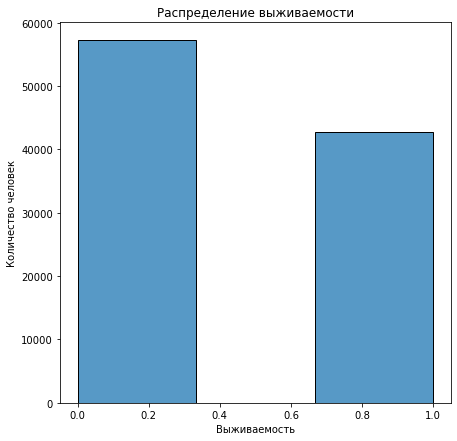

In [18]:
figure = plt.figure(figsize=(7, 7))

plt.title("Распределение выживаемости")
sns.histplot(data=titanic_data, x=titanic_data['Survived'], multiple="dodge", bins = 3)
plt.xlabel("Выживаемость")
plt.ylabel("Количество человек")
plt.show()

Выжило около 42 тыс человек. Не выжило больше человек

### Имя и фамилия пассажира

In [19]:
titanic_data.Name.value_counts()

Johnson, John        31
Smith, James         24
Smith, John          24
Johnson, William     22
Smith, Michael       20
                     ..
Davis, Andre          1
Rosenblum, Ronald     1
Landry, Ernesto       1
Mcdonald, Frances     1
Enciso, Tyler         1
Name: Name, Length: 92144, dtype: int64

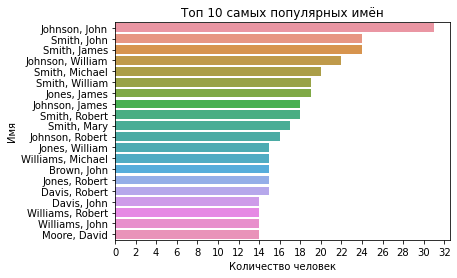

In [20]:
names = titanic_data.groupby('Name').Name.count().sort_values(ascending = False)

plt.xticks(range(0, 35, 2))
sns.barplot(y=names.iloc[0:20].index, x = names.iloc[0:20].values)
plt.title('Топ 10 самых популярных имён') 
plt.xlabel('Количество человек')
plt.ylabel('Имя')
plt.show()

Самое популярное имя пассажира на Титанике - Джонсон Джон

###  Возраст

In [21]:
titanic_data.Age.value_counts()

31.0    2609
25.0    2354
23.0    2345
26.0    2320
28.0    2315
        ... 
74.5       1
13.5       1
78.5       1
87.0       1
80.5       1
Name: Age, Length: 173, dtype: int64

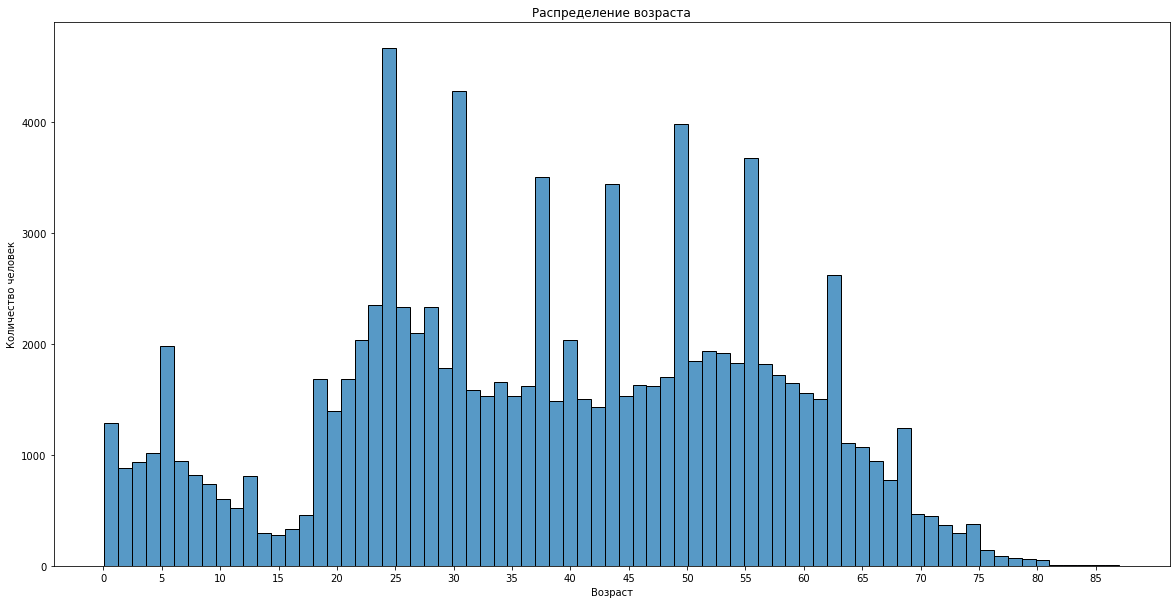

In [22]:
figure = plt.figure(figsize=(20, 10))

plt.xticks(range(0, 88, 5))
plt.title("Распределение возраста")
sns.histplot(data=titanic_data, x=titanic_data['Age'], multiple="dodge")
plt.xlabel("Возраст")
plt.ylabel("Количество человек")
plt.show()

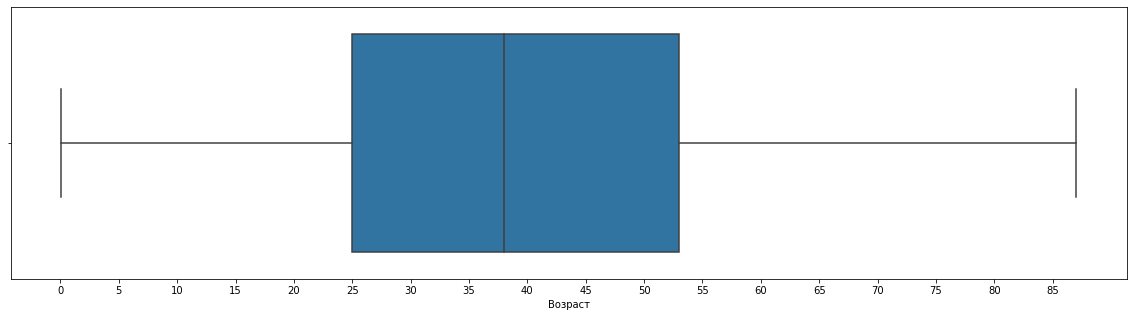

In [23]:
plt.figure(figsize=(20, 5))

plt.xticks(range(0, 88, 5))
figure = sns.boxplot(data=titanic_data, orient="h", x='Age')

plt.xlabel('Возраст')
plt.show()

Средний возраст около 38 лет

### Билет

In [24]:
titanic_data.Ticket.value_counts()

No              4623
A/5              602
C.A.             177
SC/PARIS         145
SOTON/O.Q.        80
                ... 
421812             1
PC 420601          1
PC 26800           1
STON/O 23755       1
458074             1
Name: Ticket, Length: 75332, dtype: int64

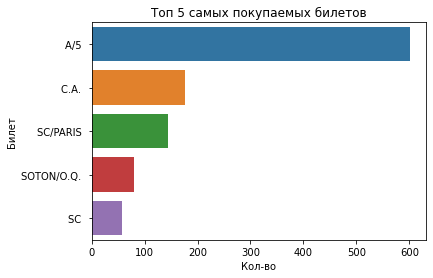

In [67]:
ticket_names = titanic_data.groupby('Ticket').Ticket.count().sort_values(ascending = False)

sns.barplot(y=ticket_names.iloc[1:6].index, x =ticket_names.iloc[1:6].values)
plt.title('Топ 5 самых покупаемых билетов') 
plt.xlabel('Кол-во')
plt.ylabel('Билет')
plt.show()

Самый популярный билет - это A/5.


### Стоимость билета

In [26]:
titanic_data.Fare.value_counts()

10.39     92
9.27      87
9.85      87
9.79      86
9.20      85
          ..
214.11     1
226.20     1
118.85     1
143.25     1
4.06       1
Name: Fare, Length: 15936, dtype: int64

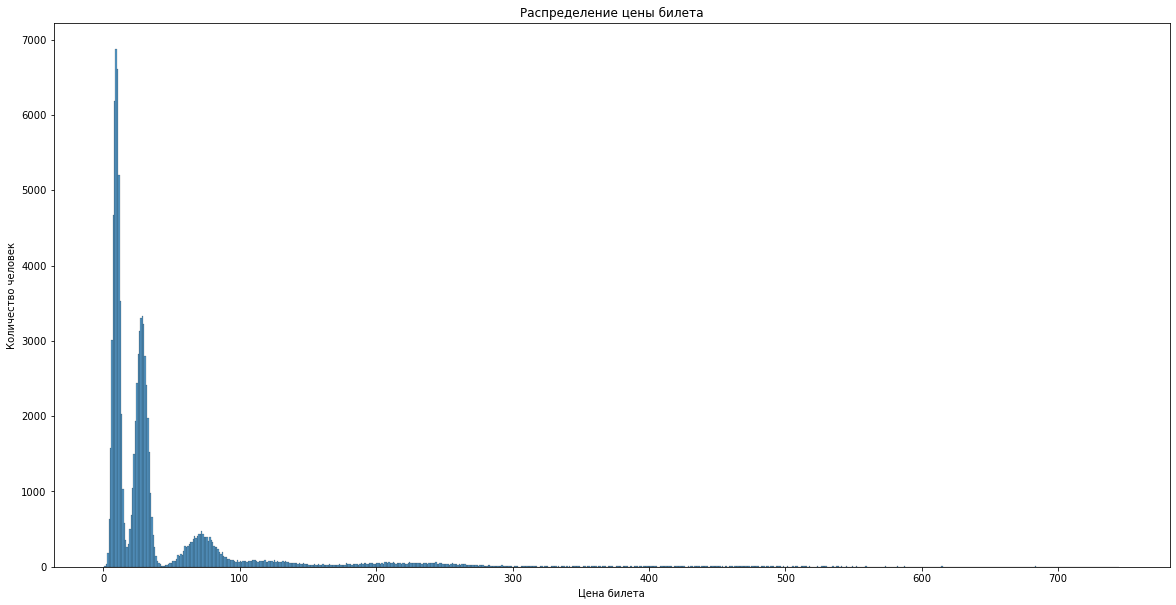

In [27]:
figure = plt.figure(figsize=(20, 10))

plt.title("Распределение цены билета")
sns.histplot(data=titanic_data, x=titanic_data['Fare'], multiple="dodge")
plt.xlabel("Цена билета")
plt.ylabel("Количество человек")
plt.show()

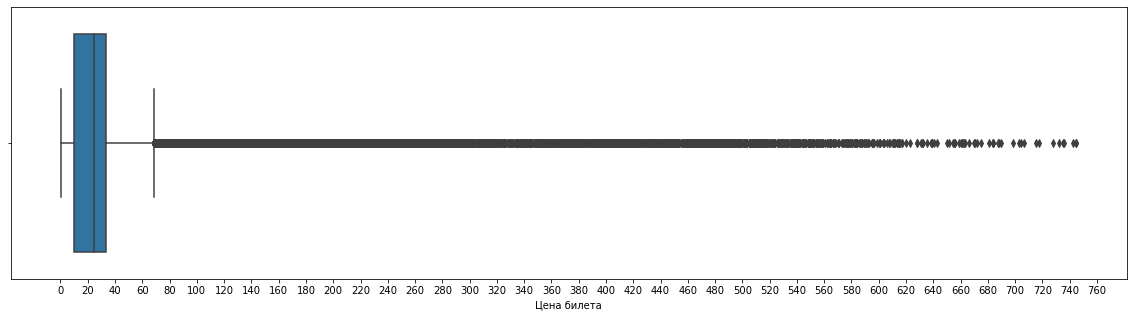

In [28]:
plt.figure(figsize=(20, 5))

plt.xticks(range(0, 780, 20))
figure = sns.boxplot(data=titanic_data, orient="h", x='Fare')

plt.xlabel('Цена билета')
plt.show()

В основном билет стоил от 10 до 35. 

### Тип каюты (класс)

In [29]:
titanic_data.Pclass.value_counts()

3    41006
1    30315
2    28679
Name: Pclass, dtype: int64

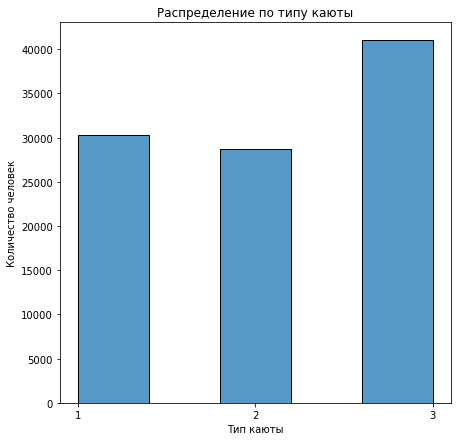

In [30]:
figure = plt.figure(figsize=(7, 7))

plt.xticks(range(1, 4))
plt.title("Распределение по типу каюты")
sns.histplot(data=titanic_data, x=titanic_data['Pclass'], multiple="dodge", bins = 5)
plt.xlabel("Тип каюты")
plt.ylabel("Количество человек")
plt.show()

Больше всего людей имели 3 класс

### Братья / сестры / супруги

In [31]:
titanic_data.SibSp.value_counts()

0    73308
1    19758
2     3703
3     1635
4     1168
8      296
5      132
Name: SibSp, dtype: int64

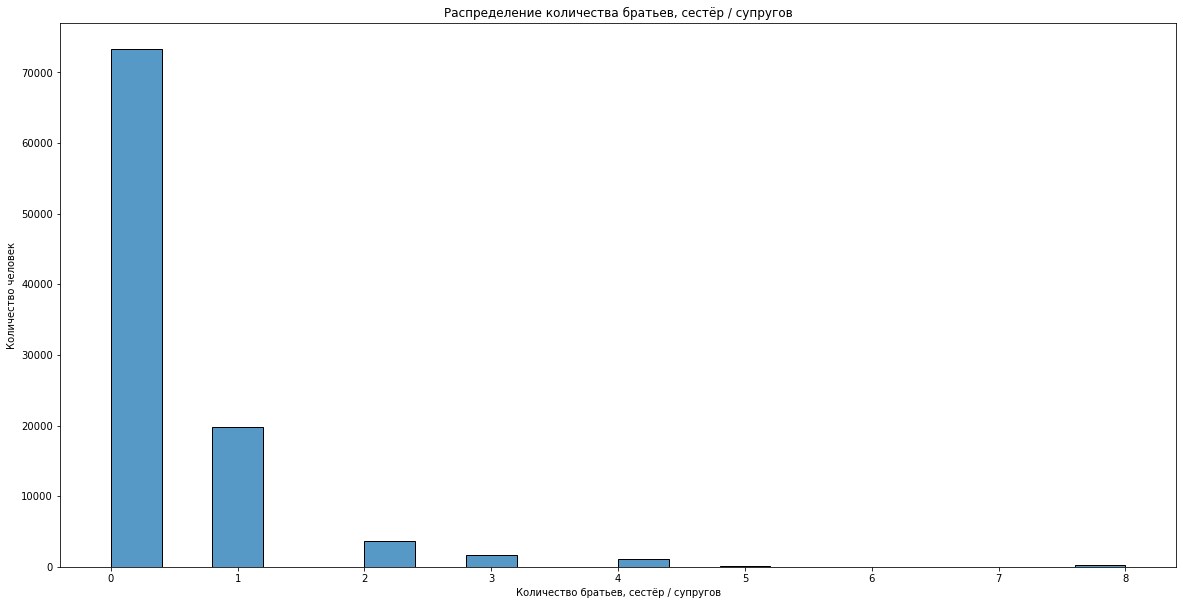

In [32]:
figure = plt.figure(figsize=(20, 10))

plt.xticks(range(0, 10))
plt.title("Распределение количества братьев, сестёр / супругов")
sns.histplot(data=titanic_data, x=titanic_data['SibSp'], multiple="dodge", bins=20)
plt.xlabel("Количество братьев, сестёр / супругов")
plt.ylabel("Количество человек")
plt.show()

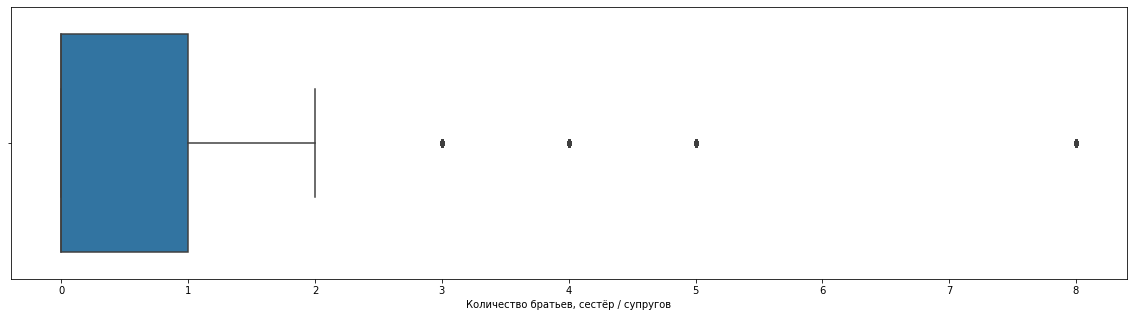

In [33]:
plt.figure(figsize=(20, 5))

plt.xticks(range(0, 10))
figure = sns.boxplot(data=titanic_data, orient="h", x='SibSp')

plt.xlabel('Количество братьев, сестёр / супругов')
plt.show()

В основном люди путешествовали без братьев, сестёр / супругов.

### Родители / дети

In [34]:
titanic_data.Parch.value_counts()

0    73540
1    12996
2    11236
3      983
4      446
5      331
9      264
6      204
Name: Parch, dtype: int64

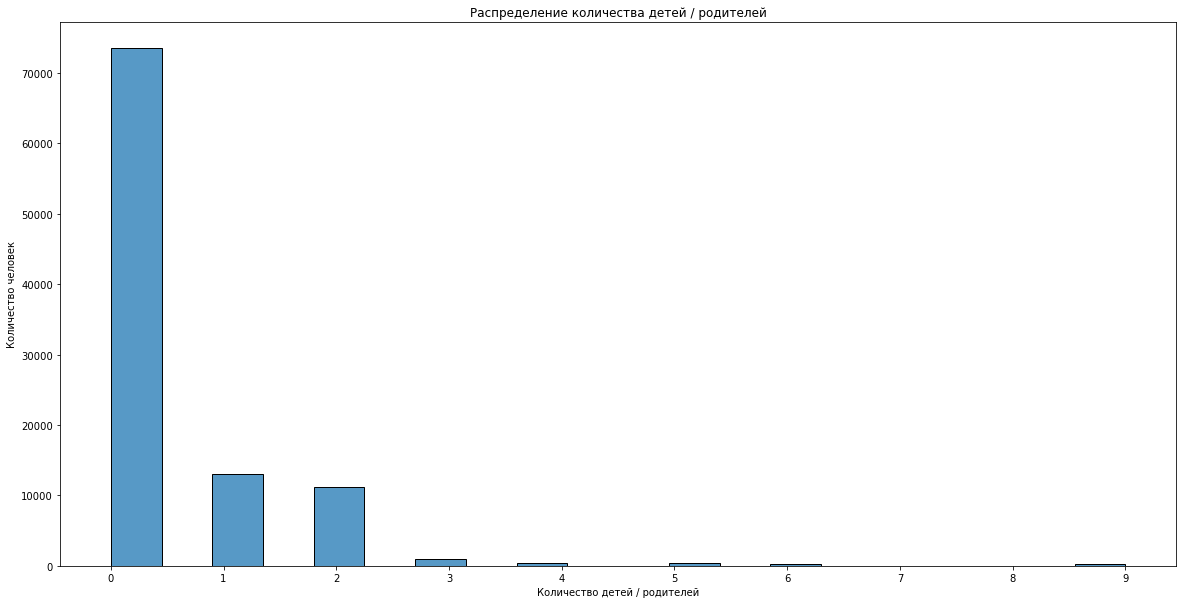

In [35]:
figure = plt.figure(figsize=(20, 10))

plt.xticks(range(0, 10))
plt.title("Распределение количества детей / родителей")
sns.histplot(data=titanic_data, x=titanic_data['Parch'], multiple="dodge", bins=20)
plt.xlabel("Количество детей / родителей")
plt.ylabel("Количество человек")
plt.show()

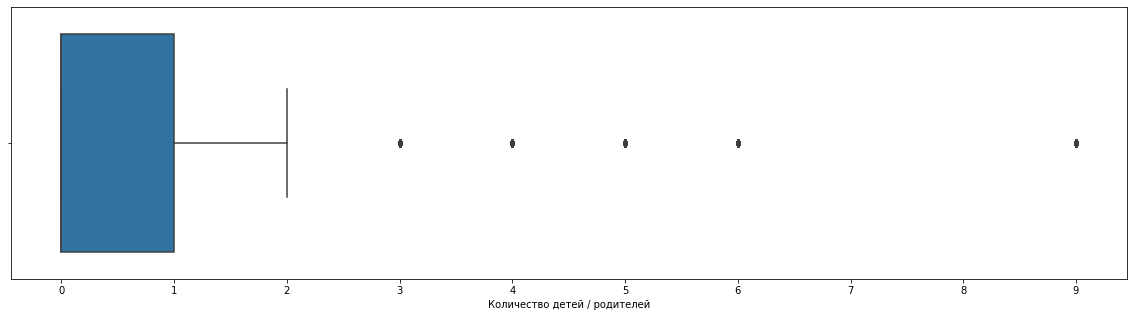

In [36]:
plt.figure(figsize=(20, 5))

plt.xticks(range(0, 10))
figure = sns.boxplot(data=titanic_data, orient="h", x='Parch')

plt.xlabel('Количество детей / родителей')
plt.show()

В основном люди путешествовали без детей / родителей. 

### Порт

In [37]:
titanic_data.Embarked.value_counts()

S    72389
C    22187
Q     5424
Name: Embarked, dtype: int64

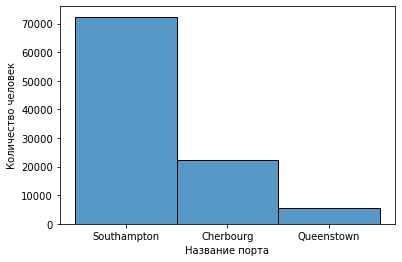

In [38]:
figure = plt.figure(figsize=(6, 4))


sns.histplot(data=titanic_data, x=titanic_data['Embarked'], bins=5)
plt.xticks(range(0, 3), ['Southampton', 'Cherbourg', 'Queenstown'])
plt.xlabel("Название порта")
plt.ylabel("Количество человек")
plt.show()

Основная часть людей зашла на Титаник в порту Southampton.

## 2. Изучение взаимосвязи между каждой переменной и целевой переменной

### Матрица корреляций

Построим матрицу корреляций между переменными

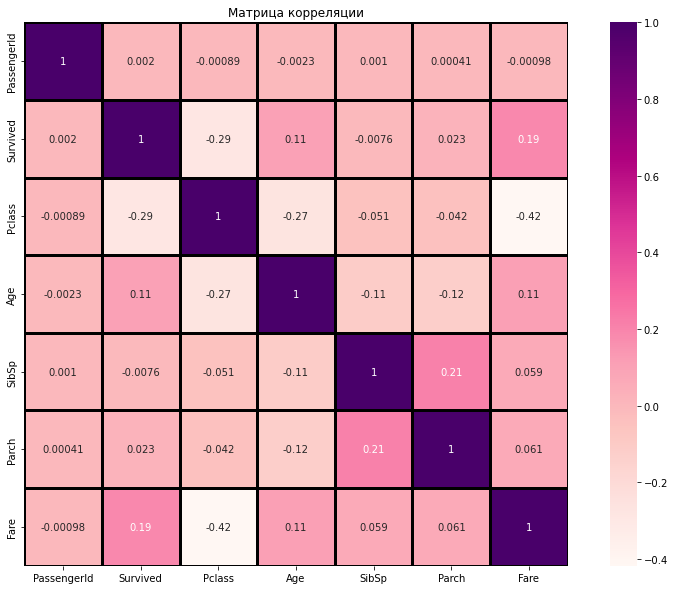

In [39]:
figure = plt.figure(figsize=(15, 10))

plt.title("Матрица корреляции")
sns.heatmap(titanic_data.corr(), annot = True, cmap= 'RdPu', square=True, 
            linewidths=3, linecolor='black')
plt.show()

Из матрицы корреляций видно, что присутствуют:
- небольшая отрицательная корреляцию между выживаемостью и классом каюты
- небольшая корреляция между классом и портом, в котором пассажир зашёл на Титаник (можно предположить, что так совпало, что в каком-то порту, заходящие пассажира имели один и тот же класс)
- корреляция между выживаемостью и портом, в котором пассажир зашёл на Титаник
- корреляция между ценой билета и классом (чем выше класс, тем дороже билет)

Целевой переменной является выживаемость. Проанализируем взаимосвязь между выживаемостью и другими переменными

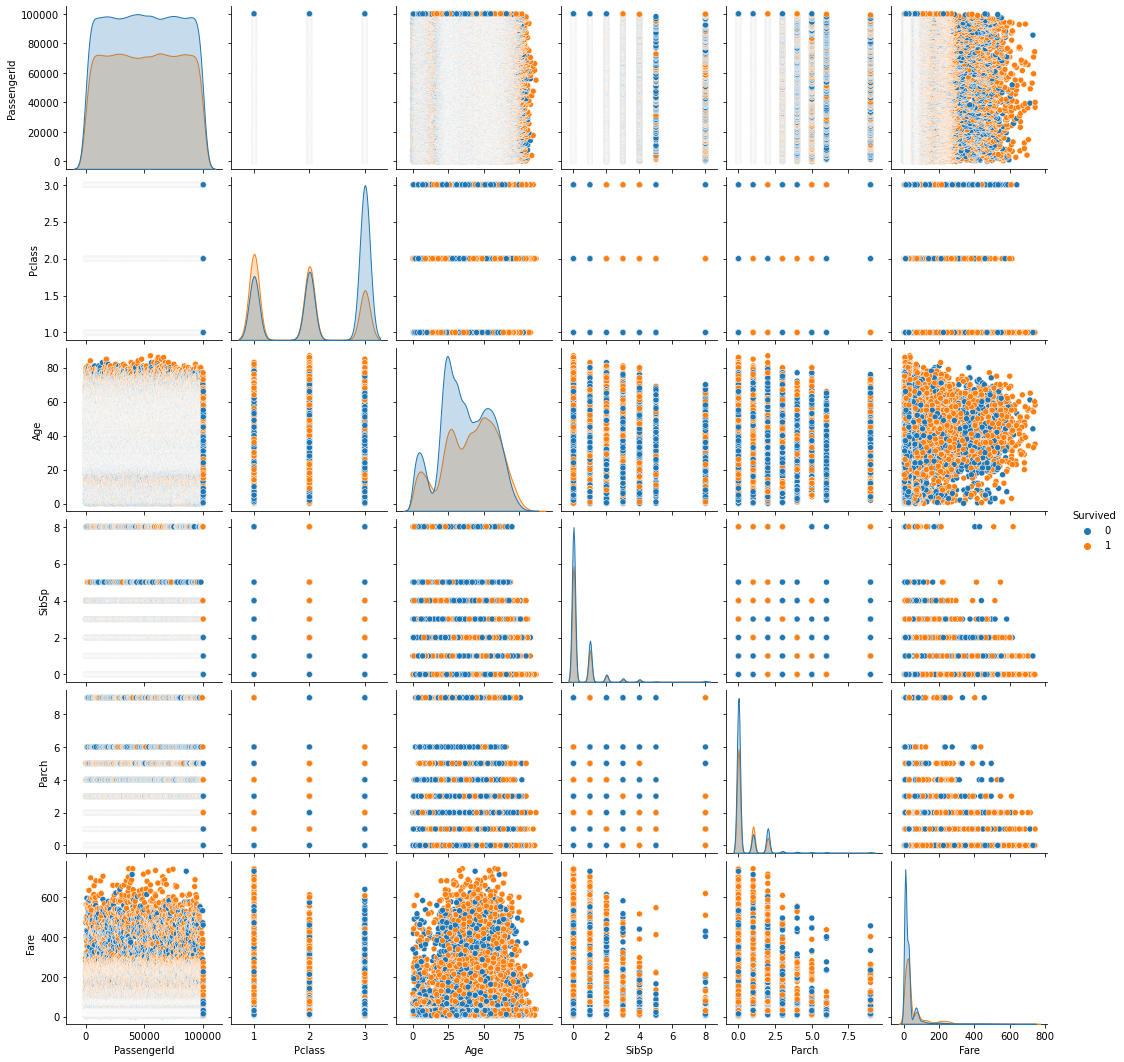

In [40]:
sns.pairplot(titanic_data, hue='Survived')
plt.show()

Рассмотрим взаимосвязи между выживаемостью и другими признаками более продробно

### Выживаемость / Пол

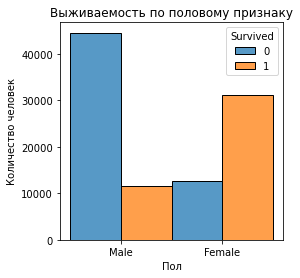

In [65]:
figure = plt.figure(figsize=(4, 4))

plt.title("Выживаемость по половому признаку")
plt.xticks(range(0, 2), ['Male', 'Female'])
sns.histplot(data=titanic_data, x=titanic_data['Sex'], hue=titanic_data['Survived'], multiple="dodge")
plt.xlabel("Пол")
plt.ylabel("Количество человек")
plt.show()

По графику можно заметить, что женщин выжило намного больше, чем мужчин (почти в 2,5 раза). Мужчин погибло в 4 раза больше, чем женщин.

### Выживаемость / Возраст

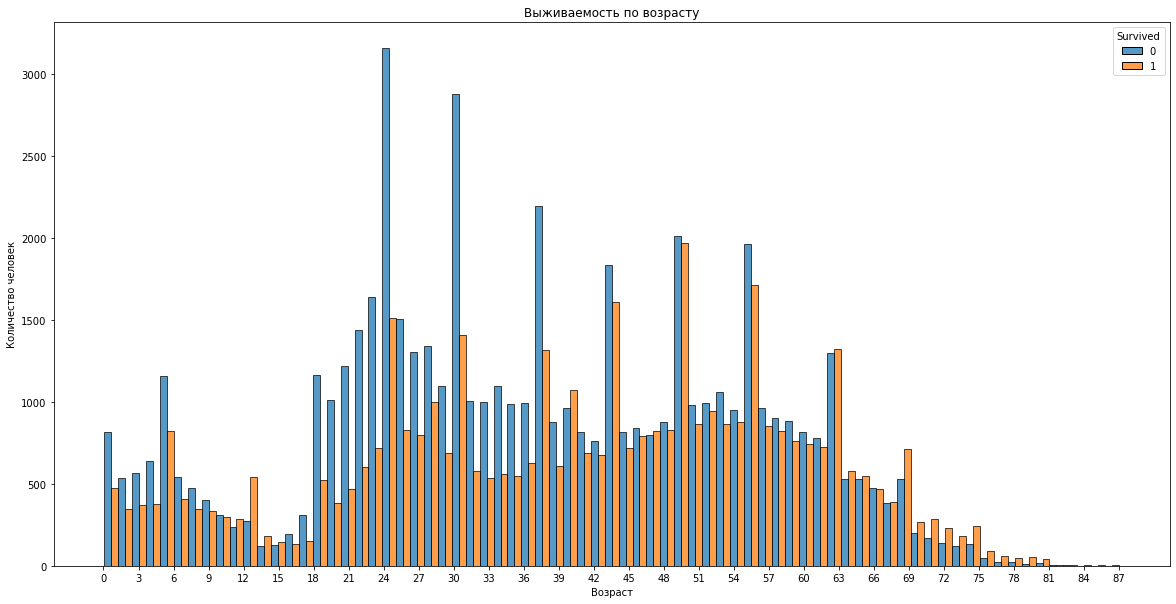

In [42]:
figure = plt.figure(figsize=(20, 10))

plt.xticks(range(0, 88, 3))
plt.title("Выживаемость по возрасту")
sns.histplot(data=titanic_data, x=titanic_data['Age'], hue=titanic_data['Survived'], multiple="dodge")
plt.xlabel("Возраст")
plt.ylabel("Количество человек")
plt.show()

Исходя из графика можно сказать, что в первую очередь спасали пожилых людей и детей, т.к. соотношения выживших к невыжимшим у них больше

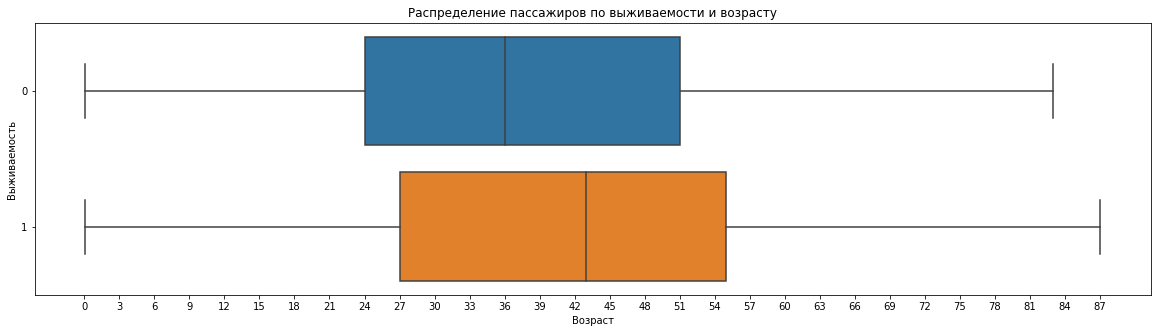

In [43]:
plt.figure(figsize=(20, 5))

plt.xticks(range(0, 88, 3))
plt.title("Распределение пассажиров по выживаемости и возрасту")
figure2 = sns.boxplot(data=titanic_data, orient="h", x='Age', y='Survived')
plt.ylabel('Выживаемость')
plt.xlabel('Возраст')
plt.show()

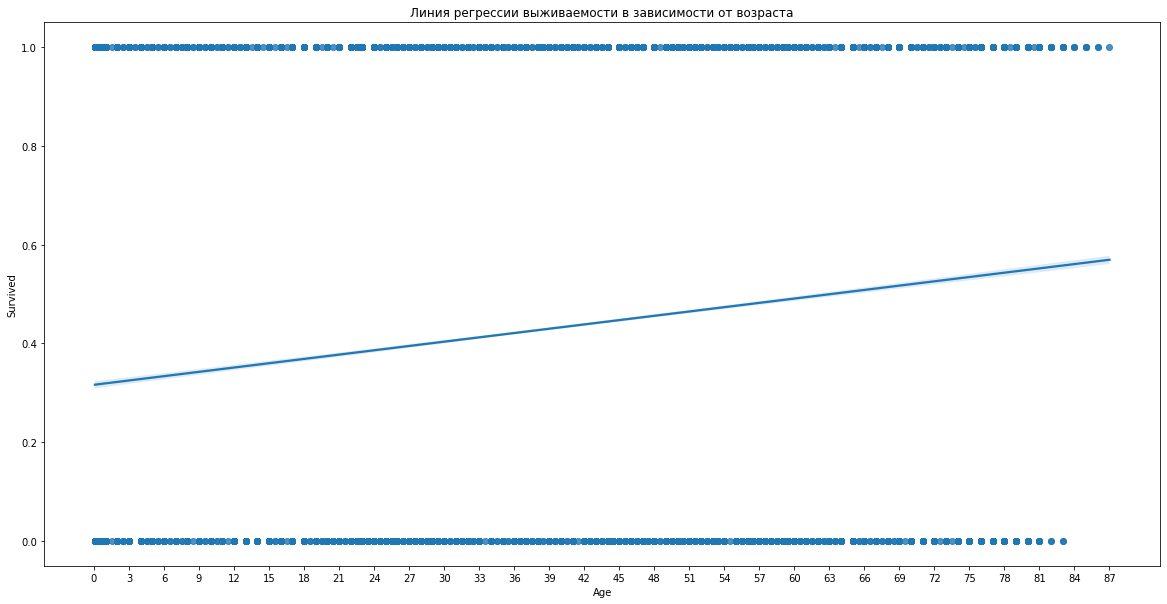

In [44]:
plt.figure(figsize=(20, 10))

plt.xticks(range(0, 88, 3))
sns.regplot(x=titanic_data['Age'], y=titanic_data['Survived'])
plt.title('Линия регрессии выживаемости в зависимости от возраста')
plt.show()

Исходя из графика видим, что средний возраст выживших выше, чем средний возраст невыживших

### Выживаемость / Тип каюты

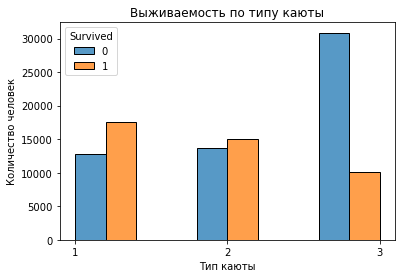

In [45]:
figure = plt.figure(figsize=(6, 4))

plt.title("Выживаемость по типу каюты")
plt.xticks(range(1, 4))
sns.histplot(data=titanic_data, x=titanic_data['Pclass'], hue=titanic_data['Survived'], multiple="dodge", bins=5)
plt.xlabel("Тип каюты")
plt.ylabel("Количество человек")
plt.show()

По графику видно, что  выживаемость у пассажиров третьего класса ниже, чем выживаемость у пассажиров первого и второго классов

### Выживаемость / Цена билета

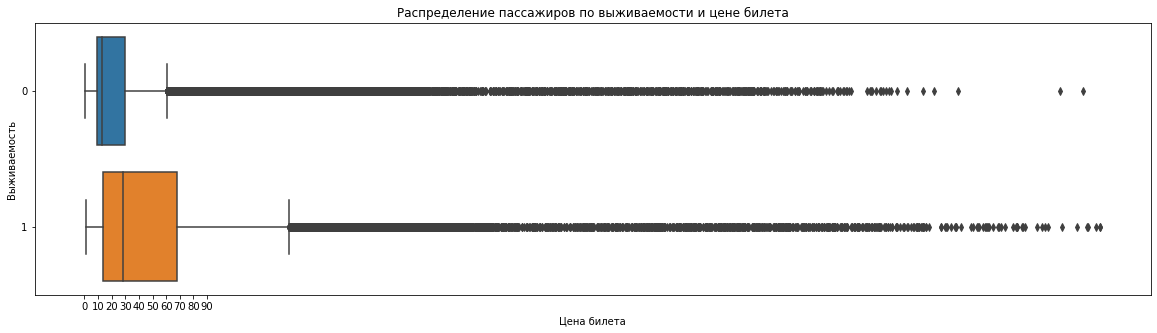

In [46]:
plt.figure(figsize=(20, 5))

plt.title("Распределение пассажиров по выживаемости и цене билета")
plt.xticks(range(0, 100, 10))
figure = sns.boxplot(data=titanic_data, orient="h", x='Fare', y='Survived')
plt.ylabel('Выживаемость')
plt.xlabel('Цена билета')
plt.show()

В основном билет стоил от 10 до 70. Можно проследить некую взаимосвязь. Чем выше цена билета, тем больше было шансов у пассажира выжить

### Выживаемость /  Количество детей, родителей

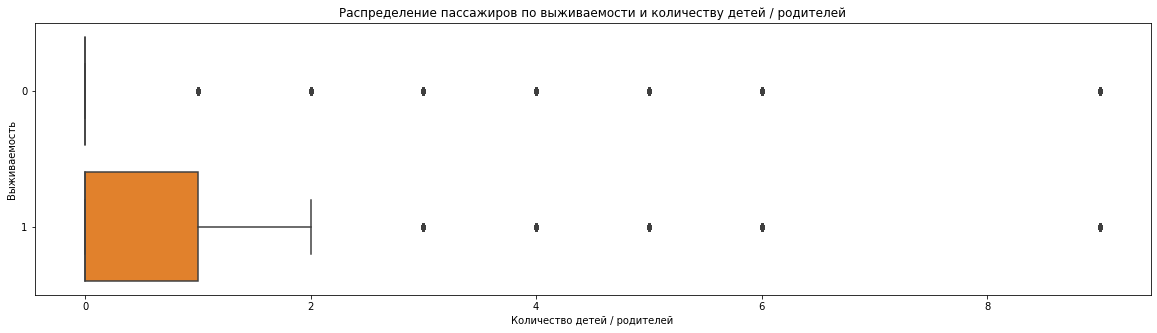

In [47]:
plt.figure(figsize=(20, 5))

plt.title("Распределение пассажиров по выживаемости и количеству детей / родителей")
figure = sns.boxplot(data=titanic_data, orient="h", x='Parch', y='Survived')
plt.ylabel('Выживаемость')
plt.xlabel('Количество детей / родителей')
plt.show()

В основном люди путешествовали без детей / родителей. В большей массе выжили люди без детей / родителей или с 1 ребёнком / родителем

### Выживаемость /  Количество братьев, сестёр, супругов

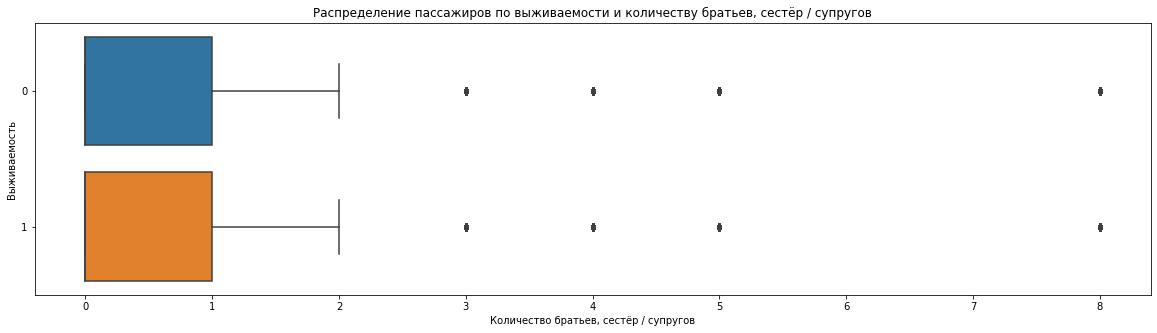

In [48]:
plt.figure(figsize=(20, 5))


plt.title("Распределение пассажиров по выживаемости и количеству братьев, сестёр / супругов")
figure = sns.boxplot(data=titanic_data, orient="h", x='SibSp', y='Survived')
plt.ylabel('Выживаемость')
plt.xlabel('Количество братьев, сестёр / супругов')
plt.show()

В основном люди путешествовали без братьев, сестёр / супругов. На выживаемость количество братьев, сестёр / супругов не влияло

### Выживаемость /  Порт, в котором пассажир зашёл на Титаник

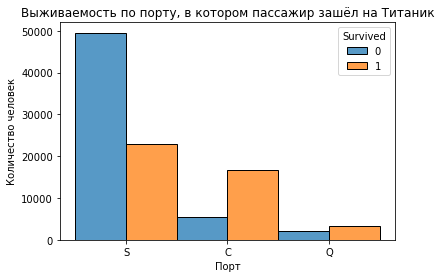

In [49]:
figure = plt.figure(figsize=(6, 4))

plt.title("Выживаемость по порту, в котором пассажир зашёл на Титаник")

sns.histplot(data=titanic_data, x=titanic_data['Embarked'], hue=titanic_data['Survived'], multiple="dodge")
plt.xlabel("Порт")
plt.ylabel("Количество человек")
plt.show()

Меньше всего шансов выжить было у пассажиров, которые зашли в Southampton. Больше всего шансов выжить было у пассажиров, которые зашли в Cherbourg

## 3. Оценка взаимодействия между переменными

### Пол / Возраст

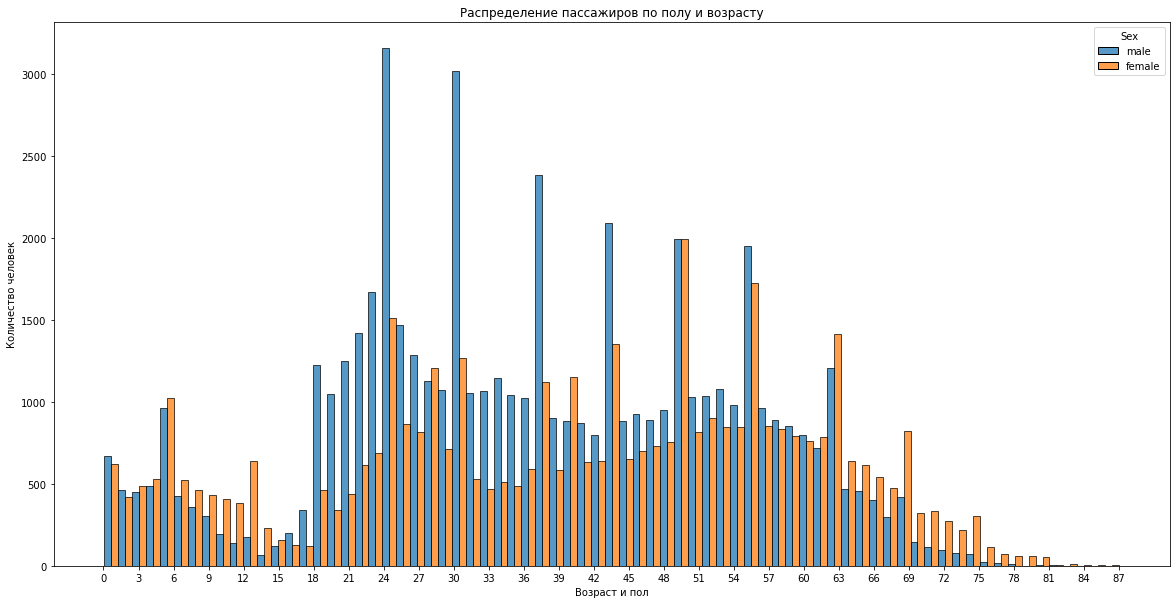

In [50]:
figure = plt.figure(figsize=(20, 10))

plt.xticks(range(0, 88, 3))
plt.title("Распределение пассажиров по полу и возрасту")
sns.histplot(data=titanic_data, x=titanic_data['Age'], hue=titanic_data['Sex'], multiple="dodge")
plt.xlabel("Возраст и пол")
plt.ylabel("Количество человек")
plt.show()

Исходя из графика можно увидеть, что в основном количество мужчин преобладало с 16 до 60 лет. Количество женщин же преобладало с 3 до 15 лет и от 60 лет

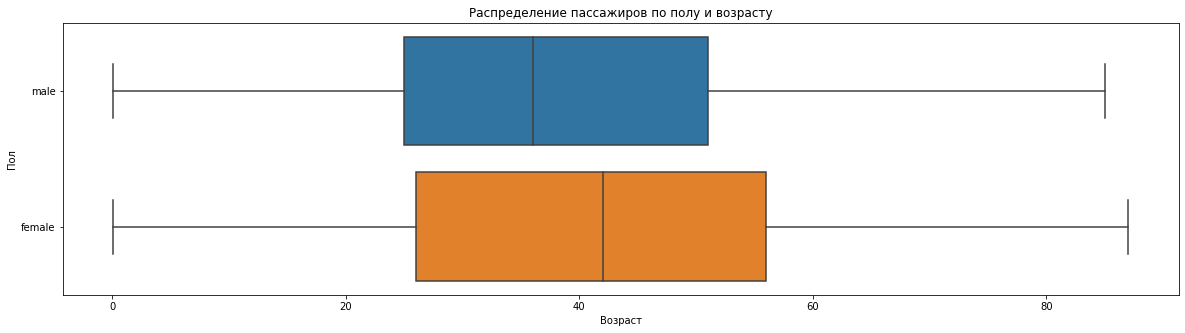

In [51]:
plt.figure(figsize=(20, 5))

plt.title("Распределение пассажиров по полу и возрасту")
figure2 = sns.boxplot(data=titanic_data, orient="h", x='Age', y='Sex')
plt.ylabel('Пол')
plt.xlabel('Возраст')
plt.show()

Средний возраст женщин был выше, чем мужчин. В основном на Титанике находились мужчины в возрасте от 24 до 49 лет, а женщины от 25 до 56 лет


### Пол / Класс

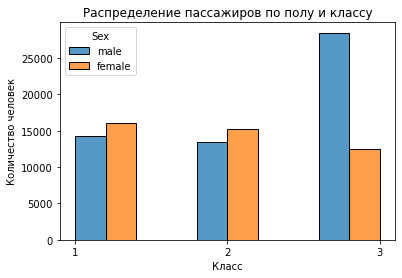

In [52]:
figure = plt.figure(figsize=(6, 4))

plt.title("Распределение пассажиров по полу и классу")
plt.xticks(range(1, 4))
sns.histplot(data=titanic_data, x=titanic_data['Pclass'], hue=titanic_data['Sex'], multiple="dodge", bins=5)
plt.xlabel("Класс")
plt.ylabel("Количество человек")
plt.show()

В первом и втором классах женщин немного больше, чем мужчин. В третьем класса мужчин почти в 2,5 раза больше, чем женщин

### Пол / Цена билета

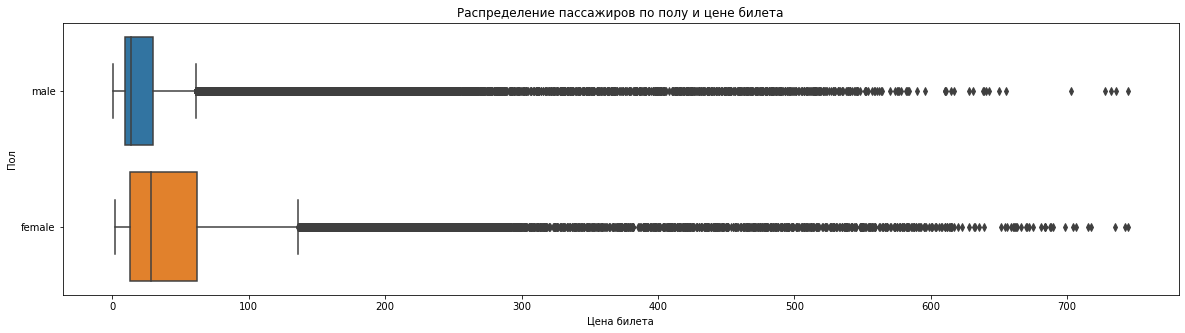

In [53]:
plt.figure(figsize=(20, 5))

plt.title("Распределение пассажиров по полу и цене билета")
figure = sns.boxplot(data=titanic_data, orient="h", x='Fare', y='Sex')
plt.ylabel('Пол')
plt.xlabel('Цена билета')
plt.show()

В основном женщины за билет платили больше, чем мужчины

###  Возраст / Класс

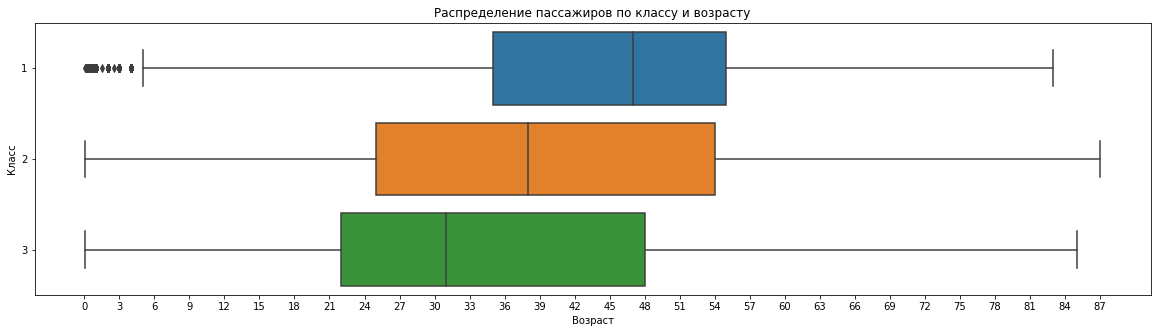

In [54]:
plt.figure(figsize=(20, 5))

plt.xticks(range(0, 88, 3))
plt.title("Распределение пассажиров по классу и возрасту")
figure = sns.boxplot(data=titanic_data, orient="h", x='Age', y='Pclass')
plt.ylabel('Класс')
plt.xlabel('Возраст')
plt.show()

Люди преклонного возраста выбирали в основном первый класс

### Цена билета / Возраст

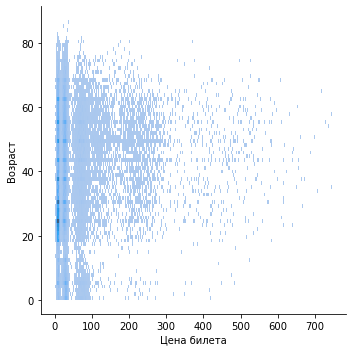

In [55]:
sns.displot(titanic_data, x="Fare", y="Age")
plt.ylabel('Возраст')
plt.xlabel('Цена билета')
plt.show()

В основном, вне зависимости от возраста, средняя цена билета была до 40

### Цена билета / Класс

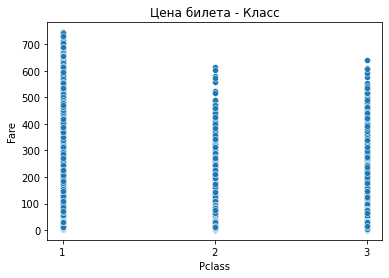

In [56]:
sns.scatterplot(x=titanic_data['Pclass'], y=titanic_data['Fare'])

plt.xticks(range(1, 4))
plt.title('Цена билета - Класс')
plt.show()

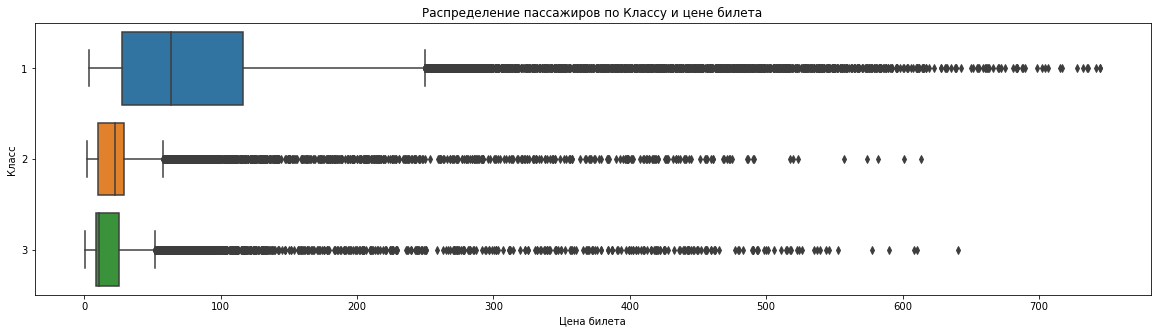

In [57]:
plt.figure(figsize=(20, 5))

plt.title("Распределение пассажиров по Классу и цене билета")
figure = sns.boxplot(data=titanic_data, orient="h", x='Fare', y='Pclass')
plt.ylabel('Класс')
plt.xlabel('Цена билета')
plt.show()

Чем выше уровень класса, тем дороже билет

### Цена билета / Порт, в котором пассажир зашёл на Титаник

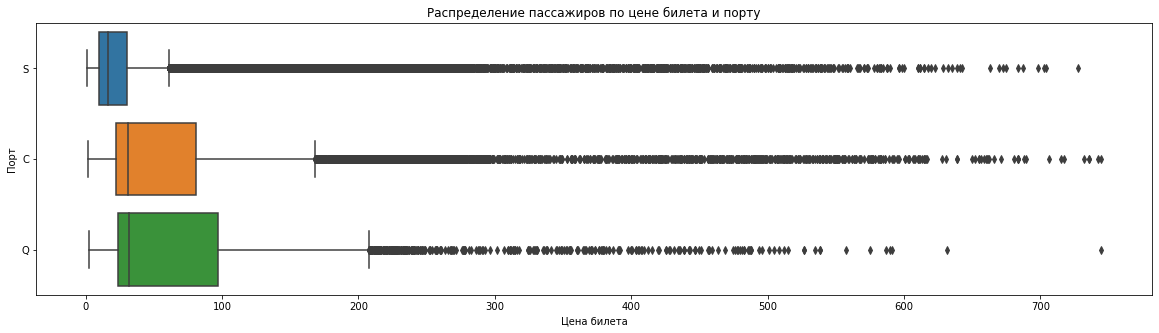

In [58]:
plt.figure(figsize=(20, 5))

plt.title("Распределение пассажиров по цене билета и порту")
plt.yticks(range(0, 3), ['C', 'Q', 'S'])
figure = sns.boxplot(data=titanic_data, orient="h", x='Fare', y='Embarked')
plt.ylabel('Порт')
plt.xlabel('Цена билета')
plt.show()

Самые дешёвые билеты были у пассажиров, которые садились в порту Southampton

### Цена билета / Количество детей, родителей

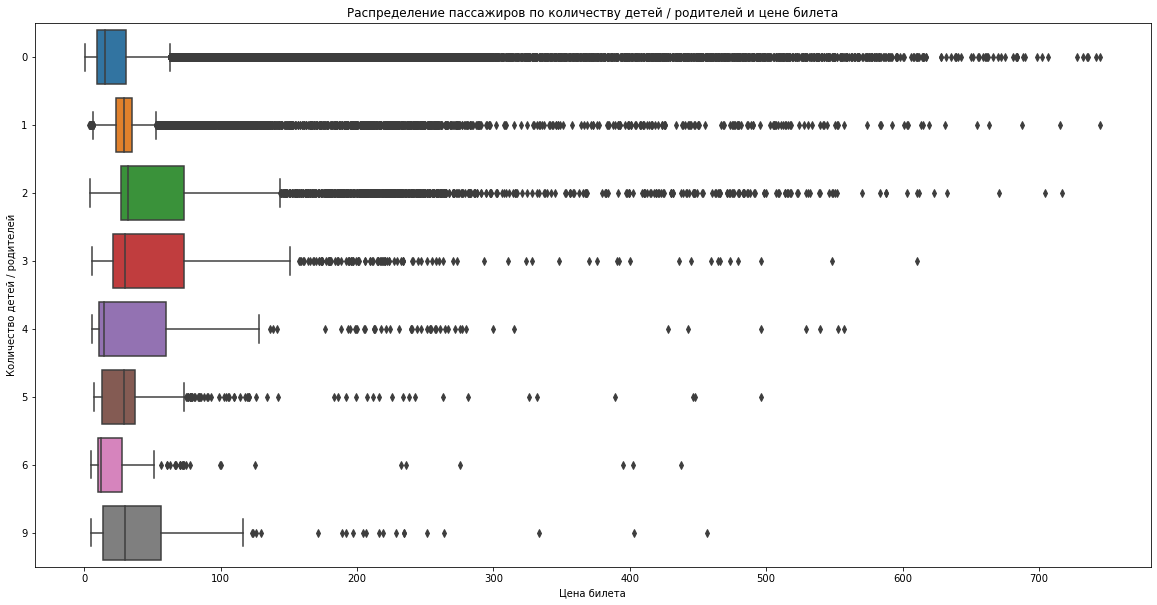

In [59]:
plt.figure(figsize=(20, 10))

plt.title("Распределение пассажиров по количеству детей / родителей и цене билета")
figure = sns.boxplot(data=titanic_data, orient="h", x='Fare', y='Parch')
plt.ylabel('Количество детей / родителей')
plt.xlabel('Цена билета')
plt.show()

В основном люди с 6 детьми / родителями платили меньше всего, а люди с 2 детьми / родителями платили за билет больше всего

### Цена билета / Количество братьев, сестёр, супругов

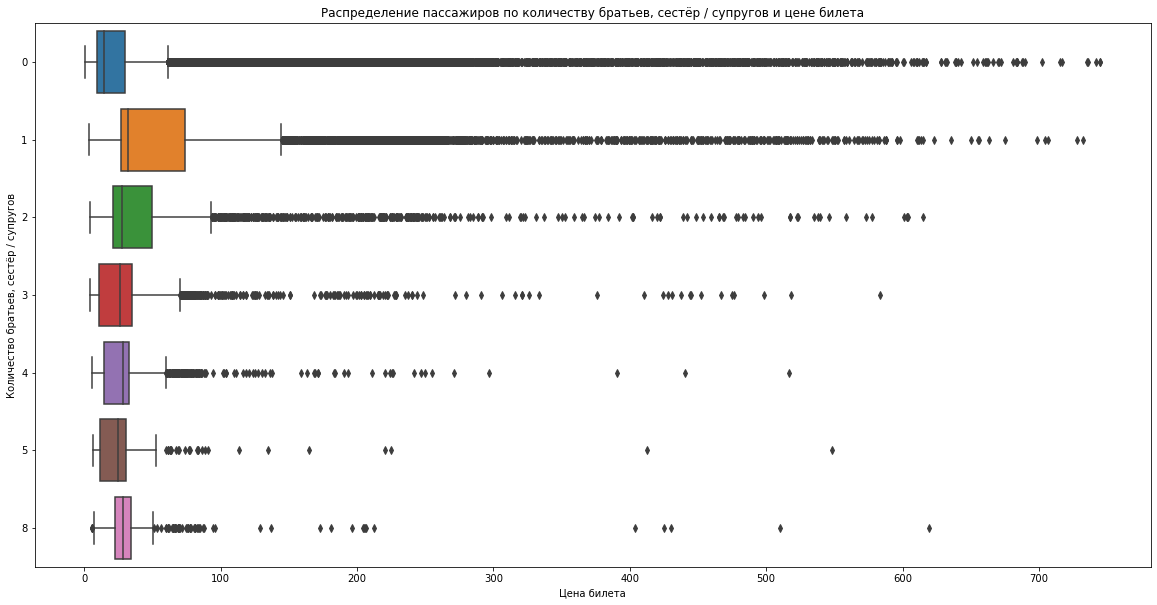

In [60]:
plt.figure(figsize=(20, 10))

plt.title("Распределение пассажиров по количеству братьев, сестёр / супругов и цене билета")
figure = sns.boxplot(data=titanic_data, orient="h", x='Fare', y='SibSp')
plt.ylabel('Количество братьев, сестёр / супругов')
plt.xlabel('Цена билета')
plt.show()

В основном люди без братьев, сестёр / супругов  платили меньше всего, а люди с 1 братом, сестрой / супругом 
платили за билет больше всего

## 4. Изучение данных во многих измерениях

### Пол / Возраст / Выживаемость

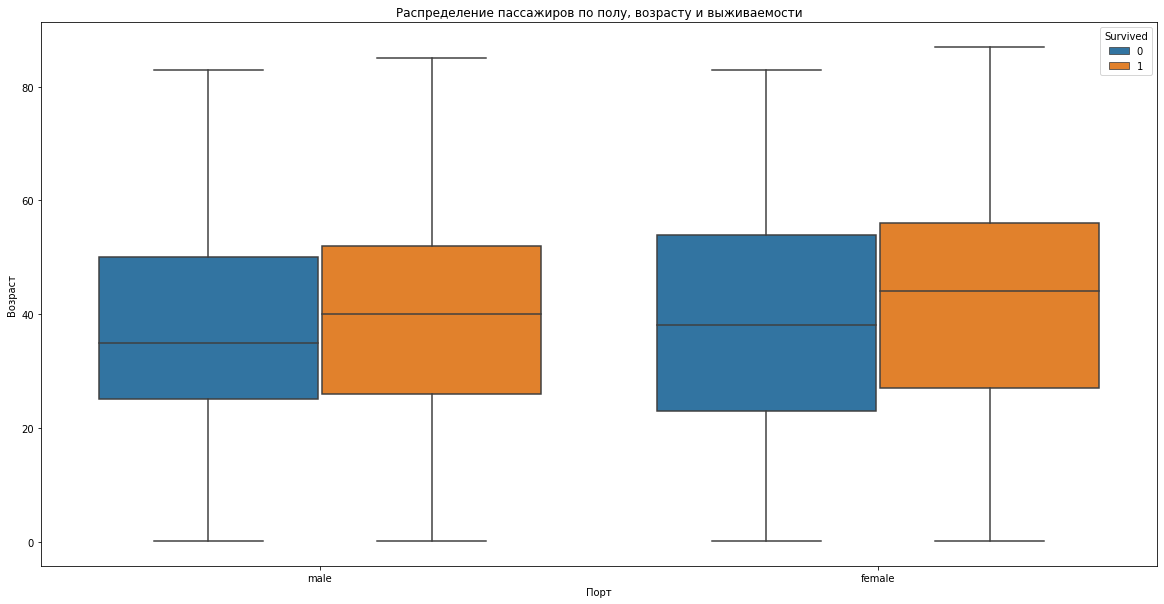

In [61]:
plt.figure(figsize=(20, 10))

plt.title("Распределение пассажиров по полу, возрасту и выживаемости")
sns.boxplot(data=titanic_data, x="Sex", y="Age", hue='Survived', showfliers = False)
plt.ylabel('Возраст')
plt.xlabel('Порт')
plt.show()

Женщин выжило больше, средний возраст выживших выше, чем невыживших

### Возраст / Порт / Класс

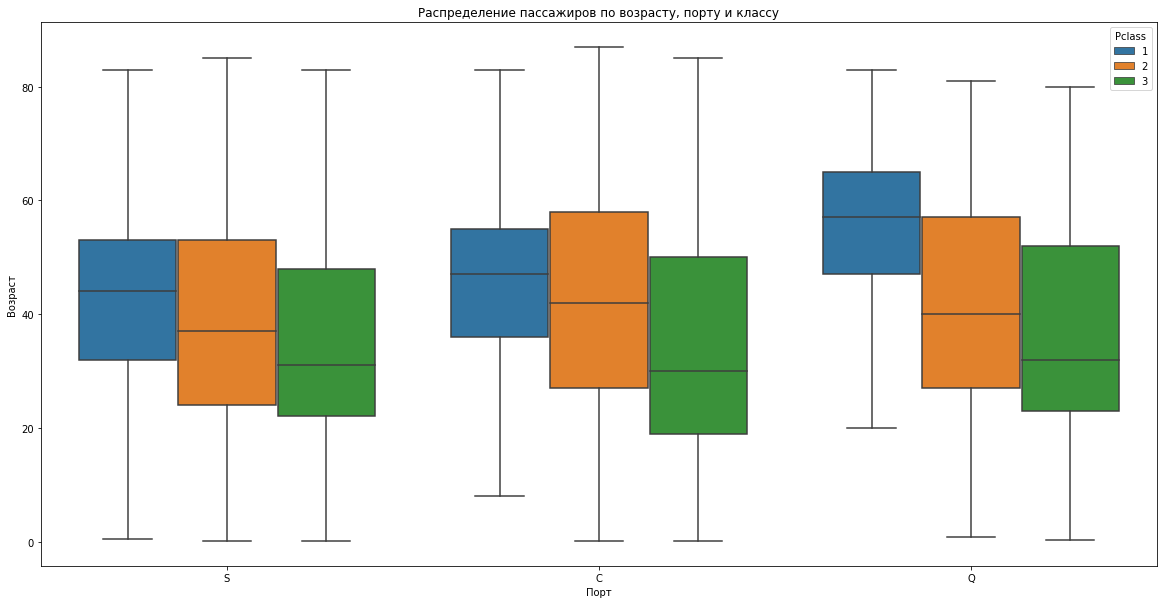

In [62]:
plt.figure(figsize=(20, 10))

plt.title("Распределение пассажиров по возрасту, порту и классу")
sns.boxplot(data=titanic_data, x="Embarked", y="Age", hue='Pclass', showfliers = False)
plt.ylabel('Возраст')
plt.xlabel('Порт')
plt.show()

Самые возрастные люди отправлялись из порта Queenstown и имели 1 класс

### Возраст / Порт / Выживаемость

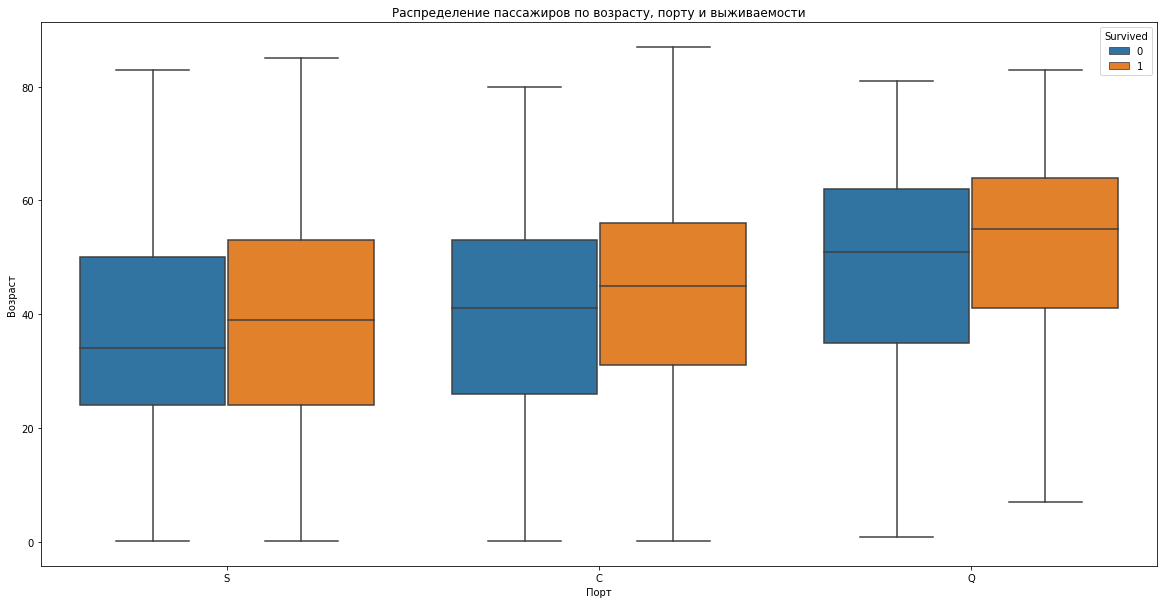

In [63]:
plt.figure(figsize=(20, 10))

plt.title("Распределение пассажиров по возрасту, порту и выживаемости")
sns.boxplot(data=titanic_data, x="Embarked", y="Age", hue='Survived', showfliers = False)
plt.ylabel('Возраст')
plt.xlabel('Порт')
plt.show()

 В Queenstown садились на Титаник более пожилые люди

# Summary

### Подведём итоги

- Целевой переменной является выживаемость. Все признаки в какой-то степени показали наличие связи с выживаемостью.
- На борту было больше мужчин, чем женщин.
- Выжило около 43% пассажиров. Женщин выжило больше, чем мужчин. Выжило около 70% женщин и всего 20% мужчин.
- Можно заметить, что независимо от исследуемого признака, процент выживших у женщин выше, чем у мужчин
- Шансы выжить выше у пассажиров с билетами 1 и 2 класса, чем у пассажиров с билетами 3 класса.
- Люди преклонного возраста больше всего выбирали 1 класс.
- У пассажиры в возрасте 20-40 лет меньше шансов выжить, а у пассажиров в возрасте от 40 лет больше шансов выжить. 
- Средний возраст выживших выше, чем невыживших.
- Выжило около 45% детей.
- Чем выше цена билета пассажира, тем больше вероятность выжить.
- Около 70% пассажиров путешествовали без детей / родителей.
- Около 70% пассажиров путешествовали без братьев, сестёр / супругов.
- В большей массе выжили люди без детей / родителей или с 1 ребёнком / родителем.
- Чем выше уровень класса, тем дороже билет.
- Самые дешёвые билеты были у людей, которые садились в порту Southampton.
- Самые возрастные люди отправлялись из порта Queenstown и имели 1 класс.
- Меньше всего шансов выжить было у пассажиров, которые зашли в Southampton. Больше всего шансов выжить было у пассажиров, которые зашли в Cherbourg
- В основном люди с 6 детьми / родителями платили меньше всего, а люди с 2 детьми / родителями платили за билет больше всего.
- В основном люди без братьев, сестёр / супругов платили меньше всего, а люди с 1 братом, сестрой / супругом платили за билет больше всего.
